# Import Library

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from time import time

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan.csv')
df.head(10)

,gender,birthdate,maritalstatus,numofdependence,education,professionid,homestatus,staysinceyear,EmploymentSinceYear,MainBusinessSinceYear,jobtypeid,jobpos,monthlyfixedincome,monthlyvariableincome,spouseincome,newapplicationdate,MaxOverDueDays,residencezipcode,companyzipcode,legalzipcode,residence_lat,residence_long,company_lat,company_long,legal_lat,legal_long,birthplace,avg_income,std_income,avg_income_cnt,avg_income_nation,std_income_nation,avg_income_nation_cnt,avg_income_area,std_icnome_area,avg_income_area_cnt,avg_sale_house_price_5000,std_sale_house_price_5000,sale_house_cnt_5000,avg_sale_apartment_price_5000,std_sale_apartment_price_5000,sale_apartment_cnt_5000,avg_rent_house_price_5000,std_rent_house_price_5000,rent_house_cnt_5000,avg_rent_apartment_price_5000,std_rent_apartment_price_5000,rent_apartment_cnt_5000,avg_sale_house_price_10000,std_sale_house_price_10000,sale_house_cnt_10000,avg_sale_apartment_price_10000,std_sale_apartment_price_10000,sale_apartment_cnt_10000,avg_rent_house_price_10000,std_rent_house_price_10000,rent_house_cnt_10000,avg_rent_apartment_price_10000,std_rent_apartment_price_10000,rent_apartment_cnt_10000,previous,distance_residence_company
0,Male,1985-12-15T17:00:00.000+00:00,SINGLE,0,BACHELOR_DEGREE,Government employees,4,2010.0,2006.0,NaN,Others,Staff,4000000.0,0.0,0.0,2012-09-05T04:49:50.000+00:00,0.0,33117,33117.0,40256,-2.188377,106.116930,-2.188377,106.116930,-6.965395,107.614134,BANDUNG,3.905436e+06,2.336988e+06,1775.0,9.336151e+08,9.643547e+11,1075437.0,4.391341e+06,2.876481e+06,3939.0,6.484425e+08,5.508472e+08,19.0,5.721607e+08,2.568821e+08,21.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,8.017849e+08,7.165296e+08,180.0,5.367837e+08,2.199754e+08,26.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,NaN,0.00000
1,Male,1969-12-20T17:00:00.000+00:00,MARRIED,2,ELEMENTARY_SCHOOL,Entrepreneur,1,1992.0,NaN,2005.0,Entrepreneur,NaN,3000000.0,0.0,0.0,2012-09-11T03:46:42.000+00:00,7.0,33681,33681.0,33681,-2.624456,106.581979,-2.624456,106.581979,-2.624456,106.581979,JAWA TENGAH,3.308757e+06,9.339743e+05,2139.0,4.792272e+06,3.890322e+08,1418874.0,3.343014e+06,1.064039e+06,2442.0,1.663636e+09,1.567656e+09,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,"2012-09-11 03:40:58,2850000.00,7,0.00",0.00000
2,Female,1976-08-17T17:00:00.000+00:00,MARRIED,2,SENIOR_HIGH_SCHOOL,Entrepreneur,1,2008.0,NaN,2010.0,Entrepreneur,NaN,3000000.0,0.0,0.0,2012-09-17T02:19:57.000+00:00,17.0,33674,33674.0,33674,-2.346277,105.993491,-2.346277,105.993491,-2.346277,105.993491,PANGKALPINANG,4.109646e+06,3.383104e+06,311.0,4.792272e+06,3.890322e+08,1418874.0,4.074921e+06,3.171127e+06,381.0,1.663636e+09,1.567656e+09,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,NaN,0.00000
3,Male,1985-01-09T17:00:00.000+00:00,MARRIED,1,ELEMENTARY_SCHOOL,Entrepreneur,1,2002.0,NaN,2005.0,Entrepreneur,NaN,5000000.0,0.0,0.0,2012-09-21T01:28:04.000+00:00,10.0,33782,33782.0,33782,-2.703447,106.393478,-2.703447,106.393478,-2.703447,106.393478,JAMBI,3.489542e+06,5.893143e+06,459.0,4.792272e+06,3.890322e+08,1418874.0,3.537224e+06,5.802110e+06,479.0,6.318182e+08,5.085613e+08,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,NaN,0.00000
4,Female,1979-08-16T17:00:00.000+00:00,MARRIED,1,ELEMENTARY_SCHOOL,Entrepreneur,1,2007.0,NaN,2007.0,Entrepreneur,NaN,3800000.0,0.0,0.0,2012-09-26T03:16:50.000+00:00,10.0,33172,33172.0,33172,-2.042226,106.087533,-2.042226,106.087533,-2.042226,106.087533,SUNGAILIAT,4.20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          9374 non-null   object 
 1   birthdate                       9374 non-null   object 
 2   maritalstatus                   9373 non-null   object 
 3   numofdependence                 9374 non-null   int64  
 4   education                       9374 non-null   object 
 5   professionid                    9374 non-null   object 
 6   homestatus                      9374 non-null   int64  
 7   staysinceyear                   9374 non-null   float64
 8   EmploymentSinceYear             5004 non-null   float64
 9   MainBusinessSinceYear           4514 non-null   float64
 10  jobtypeid                       9370 non-null   object 
 11  jobpos                          5332 non-null   object 
 12  monthlyfixedincome              93

> We can see that there are many Null values on these features, such as "EmploymentSinceYear," "MainBusinessSinceYear," "jobpos," "avg_income," and "previous." Further exploration is needed to understand the impact of these missing values on the analysis.

In [ ]:
df.describe()

,numofdependence,homestatus,staysinceyear,EmploymentSinceYear,MainBusinessSinceYear,monthlyfixedincome,monthlyvariableincome,spouseincome,MaxOverDueDays,residencezipcode,companyzipcode,legalzipcode,residence_lat,residence_long,company_lat,company_long,legal_lat,legal_long,avg_income,std_income,avg_income_cnt,avg_income_nation,std_income_nation,avg_income_nation_cnt,avg_income_area,std_icnome_area,avg_income_area_cnt,avg_sale_house_price_5000,std_sale_house_price_5000,sale_house_cnt_5000,avg_sale_apartment_price_5000,std_sale_apartment_price_5000,sale_apartment_cnt_5000,avg_rent_house_price_5000,std_rent_house_price_5000,rent_house_cnt_5000,avg_rent_apartment_price_5000,std_rent_apartment_price_5000,rent_apartment_cnt_5000,avg_sale_house_price_10000,std_sale_house_price_10000,sale_house_cnt_10000,avg_sale_apartment_price_10000,std_sale_apartment_price_10000,sale_apartment_cnt_10000,avg_rent_house_price_10000,std_rent_house_price_10000,rent_house_cnt_10000,avg_rent_apartment_price_10000,std_rent_apartment_price_10000,rent_apartment_cnt_10000,distance_residence_company
count,9374.000000,9374.000000,9374.000000,5004.000000,4514.000000,9.374000e+03,9.374000e+03,9.374000e+03,9374.000000,9374.000000,9119.000000,9374.000000,9374.000000,9374.000000,9119.000000,9119.000000,9374.000000,9374.000000,9.115000e+03,9.115000e+03,9115.000000,9.370000e+03,9.370000e+03,9.370000e+03,9.119000e+03,9.119000e+03,9119.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9374.000000,9.374000e+03,9.374000e+03,9373.000000,9.373000e+03,9.373000e+03,9373.000000,9.118000e+03
mean,1.560166,1.412844,1998.280883,2000.117506,2005.445946,3.525633e+06,2.108372e+05,3.591203e+04,56.508214,61495.932153,61590.758416,61416.293151,-4.386509,112.555528,-4.341350,112.622677,-4.400376,112.523624,4.958297e+08,2.586896e+10,3489.987493,4.024758e+08,4.132037e+11,1.148916e+06,3.215501e+08,2.588792e+10,7486.165479,1.015313e+09,1.281534e+09,1133.653403,8.641156e+08,8.003526e+08,520.037657,5.705316e+07,9.728054e+07,149.710369,3.984893e+07,7.119841e+07,763.856945,1.076473e+09,1.466055e+09,2499.746213,8.598674e+08,9.086273e+08,678.689247,5.899727e+07,1.317868e+08,254.761442,3.444806e+07,5.411067e+07,645.003521,3.120046e+04
std,1.256735,0.691684,12.274221,106.227861,6.578900,3.306056e+06,1.925790e+06,4.038831e+05,126.049660,27775.376825,28053.963853,27791.055186,3.162457,7.209439,3.184171,7.151928,3.165976,7.190898,1.430412e+10,7.008677e+11,4978.268805,4.597328e+08,4.770540e+11,3.817809e+05,7.418427e+09,5.629151e+11,9514.170516,8.665955e+08,1.131948e+09,2988.666310,8.394650e+08,1.199427e+09,1580.974267,7.831860e+07,2.742682e+08,272.883548,4.611522e+07,1.185078e+08,1856.598634,7.715445e+08,1.009202e+09,6321.513419,7.053141e+08,1.201859e+09,1783.989886,8.175487e+07,3.085119e+08,427.274605,4.273373e+07,8.892526e+07,1696.138643,1.636752e+05
min,0.000000,0.000000,1952.000000,0.000000,1960.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,10120.000000,0.000000,10120.000000,-10.194787,98.046519,-10.194787,98.046519,-10.194787,98.046519,1.050000e+06,0.000000e+00,1.000000,2.814560e+06,1.517182e+06,1.040000e+02,1.523732e+06,0.000000e+00,1.000000,1.053500e+08,3.113144e+06,10.000000,1.162652e+08,3.015113e+06,10.000000,1.249629e+06,1.985763e+06,10.000000,8.900000e+05,1.075337e+06,10.000000,1.376765e+08,6.420909e+06,10.000000,1.175259e+08,3.015113e+06,10.000000,2.672000e+06,1.420000e+02,10.000000,1.681316e+06,6.171170e+05,10.000000,0.000000e+00
25%,1.000000,1.000000,1990.000000,2003.000000,2003.000000,2.000000e+06,0.000000e+00,0.000000e+00,1.000000,34192.000000,34167.000000,34192.250000,-6.918693,106.835537,-6.918693,106.839962,-6.926349,106.834062,2.720548e+06,1.369792e+06,491.000000,4.792272e+06,3.890322e+08,1.075437e+06,2.814838e+06,1.589721e+06,1398.000000,5.045641e+08,5.116842e+08,15.000000,3.316614e+08,1.302235e+08,15.0

Numerous features present a significant amount of missing data, with "previous," "MainBusinessSinceYear," and "EmploymentSinceYear" surpassing the 40% threshold. It's imperative to acknowledge that these percentages might not be entirely accurate, as they are derived from raw, unprocessed data. Furthermore, to identify loan defaults, we can utilize the "MaxOverDueDays" feature, where values exceeding 90 would signify borrower default on the loan.



In [ ]:
def summary(df):

    columns = df.columns.to_list()

    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

In [ ]:
summary(df).head(10)

,column,dtypes,unique_count,missing_values,missing_percentage,total_count
0,previous,object,3523,5851,62.42,9374
1,MainBusinessSinceYear,float64,47,4860,51.85,9374
2,EmploymentSinceYear,float64,45,4370,46.62,9374
3,jobpos,object,5,4042,43.12,9374
4,avg_income_cnt,float64,2395,259,2.76,9374
5,std_income,float64,3949,259,2.76,9374
6,avg_income,float64,3956,259,2.76,9374
7,distance_residence_company,float64,3435,256,2.73,9374
8,companyzipcode,float64,2725,255,2.72,9374
9,avg_income_area_cnt,float64,2127,255,2.72,9374


In [ ]:
df['flag_default'] = df['MaxOverDueDays'].apply(lambda x: 1 if x>90 else 0)

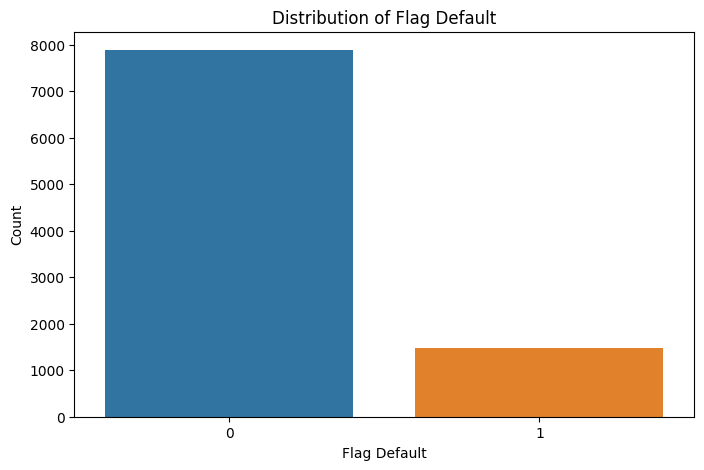

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='flag_default', data=df)
plt.xlabel('Flag Default')
plt.ylabel('Count')
plt.title('Distribution of Flag Default')
plt.show()

> > We can see that the distribution of the **flag_default** is rather imbalanced, far more clients have <=90 days overdue. And this is normal in any of these cases.

In [ ]:
df.describe(include=np.object)

,gender,birthdate,maritalstatus,education,professionid,jobtypeid,jobpos,newapplicationdate,birthplace,previous
count,9374,9374,9373,9374,9374,9370,5332,9374,9374,3523
unique,2,6314,4,8,5,20,5,9374,2334,3523
top,Male,1969-12-30T17:00:00.000+00:00,MARRIED,SENIOR_HIGH_SCHOOL,Entrepreneur,Entrepreneur,Staff,2012-09-05T04:49:50.000+00:00,JAKARTA,"2012-09-11 03:40:58,2850000.00,7,0.00"
freq,5087,15,7836,5380,4519,4515,4270,1,383,1


In [ ]:
columns = ['monthlyfixedincome', 'monthlyvariableincome', 'spouseincome', \
           'avg_income', 'std_income', 'avg_income_cnt', 'avg_income_nation_cnt', \
           'avg_income_area', 'std_icnome_area', 'avg_income_area_cnt', 'avg_sale_house_price_5000', \
           'std_sale_house_price_5000', 'sale_house_cnt_5000', 'avg_sale_apartment_price_5000', \
           'std_sale_apartment_price_5000', 'sale_apartment_cnt_5000', \
           'avg_rent_house_price_5000', 'std_rent_house_price_5000', 'rent_house_cnt_5000', \
           'avg_rent_apartment_price_5000', 'std_rent_apartment_price_5000', \
           'rent_apartment_cnt_5000', 'avg_sale_house_price_10000', 'std_sale_house_price_10000', \
           'sale_house_cnt_10000', 'avg_sale_apartment_price_10000', 'std_sale_apartment_price_10000', \
           'sale_apartment_cnt_10000', 'avg_rent_house_price_10000', 'std_rent_house_price_10000', \
           'rent_house_cnt_10000', 'avg_rent_apartment_price_10000', 'std_rent_apartment_price_10000', \
           'rent_apartment_cnt_10000', 'distance_residence_company']

In [ ]:
r = np.random.RandomState(42)
res = r.choice(df.shape[0], size=40000, replace=True)

In [ ]:
def plot_feature_scatter(df1, df2, features, size=[4,4]):
    i = 0
    sns.set_style("whitegrid")
    plt.figure

    fig, ax = plt.subplots(size[0], size[1], figsize=(size[1]*5, size[0]*5))

    for feature in features:
        i += 1
        plt.subplot(size[0], size[1], i)
        plt.scatter(df1[feature], df2[feature], marker="*", color='#2B3A67', alpha=0.2)
        plt.xlabel(feature, fontsize=9)

    plt.show()

>
Next, we will create a visualization using this code to compare the distribution of features in two data frame

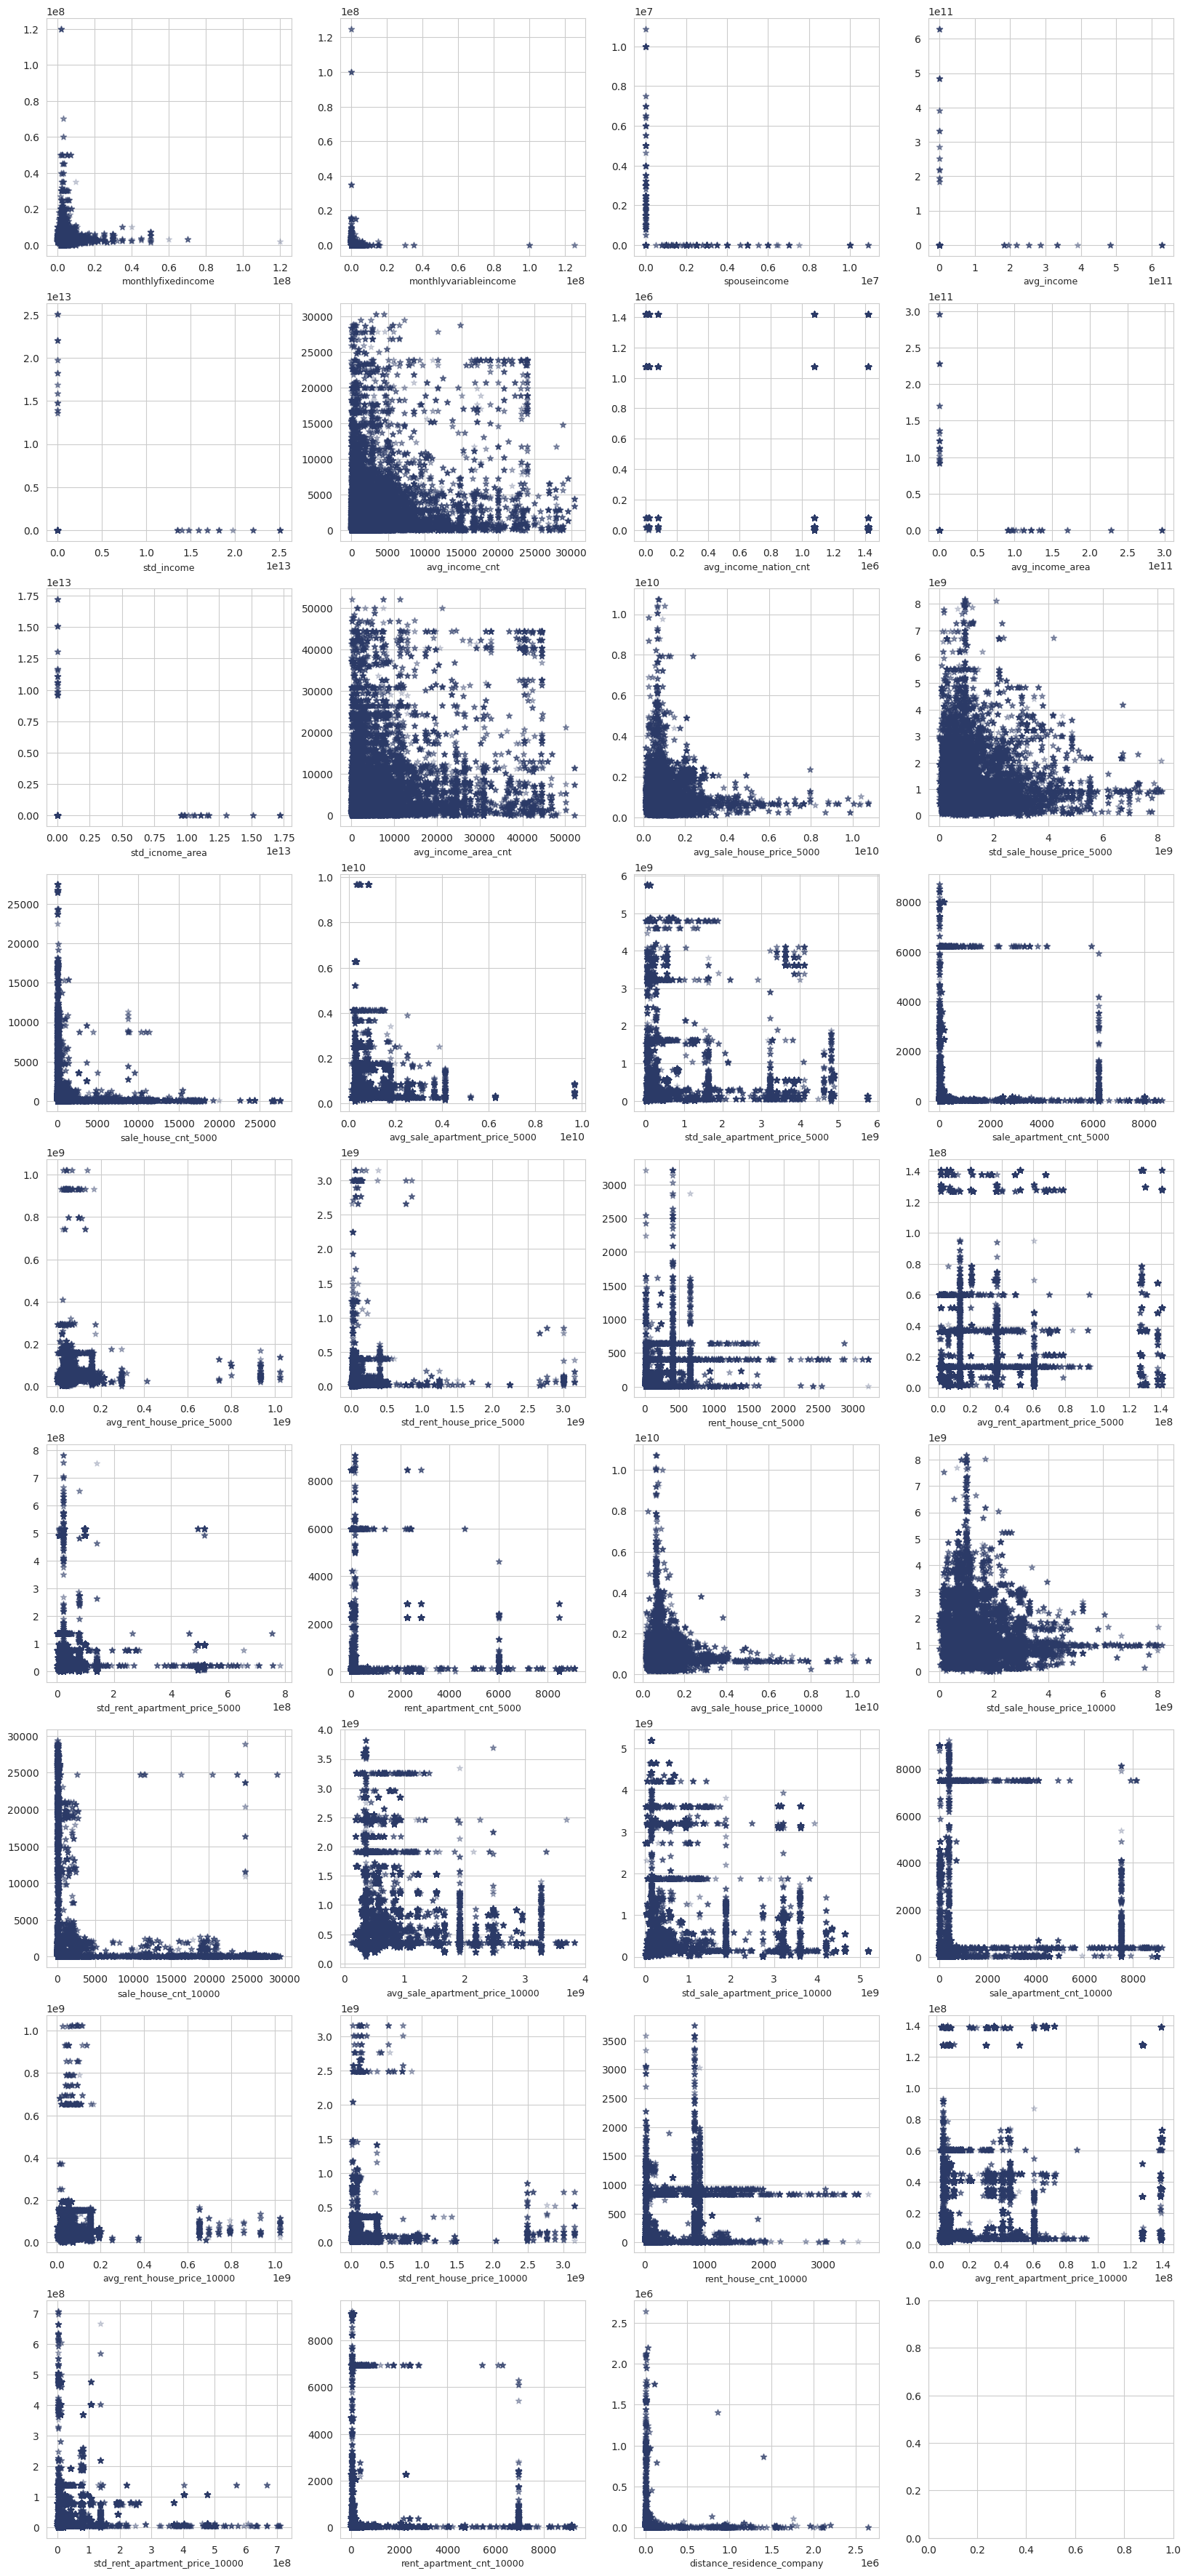

In [ ]:
plot_feature_scatter(df.iloc[res], df.iloc[~res], columns, size=[9,4])

> To begin with, this plot allows us to observe the distribution of features within the dataset. Furthermore, it highlights the presence of pronounced outliers in certain features, such as "income" and "rent_house_price." Typically, we notice that these features exhibit a pattern where data points are more concentrated at lower values and become less dense as the values increase.

> Now, let's explore another aspect. For instance, we might be interested in generating a kernel density estimation plot, which proves valuable for visualizing the impact of a feature on our target variable.







In [ ]:
def plot_feature_kde(df1, df2, label1, label2, features, size=[4, 4]):
    i = 0
    sns.set_style("whitegrid")

    plt.figure()
    fig, ax = plt.subplots(size[0], size[1], figsize=(size[1]*5, size[0]*5))

    for feature in features:
        i += 1
        plt.subplot(size[0], size[1], i)

        sns.kdeplot(df1[feature], label=label1, color="#5982C5")
        sns.kdeplot(df2[feature], label=label2, color="#FB3523")

        plt.xlabel(feature, fontsize=9)

        locs, labels = plt.xticks()
        plt.tick_params(axis="x", which="major", labelsize=6, pad=6)
        plt.tick_params(axis="y", which="major", labelsize=6)

    plt.show()


<Figure size 640x480 with 0 Axes>

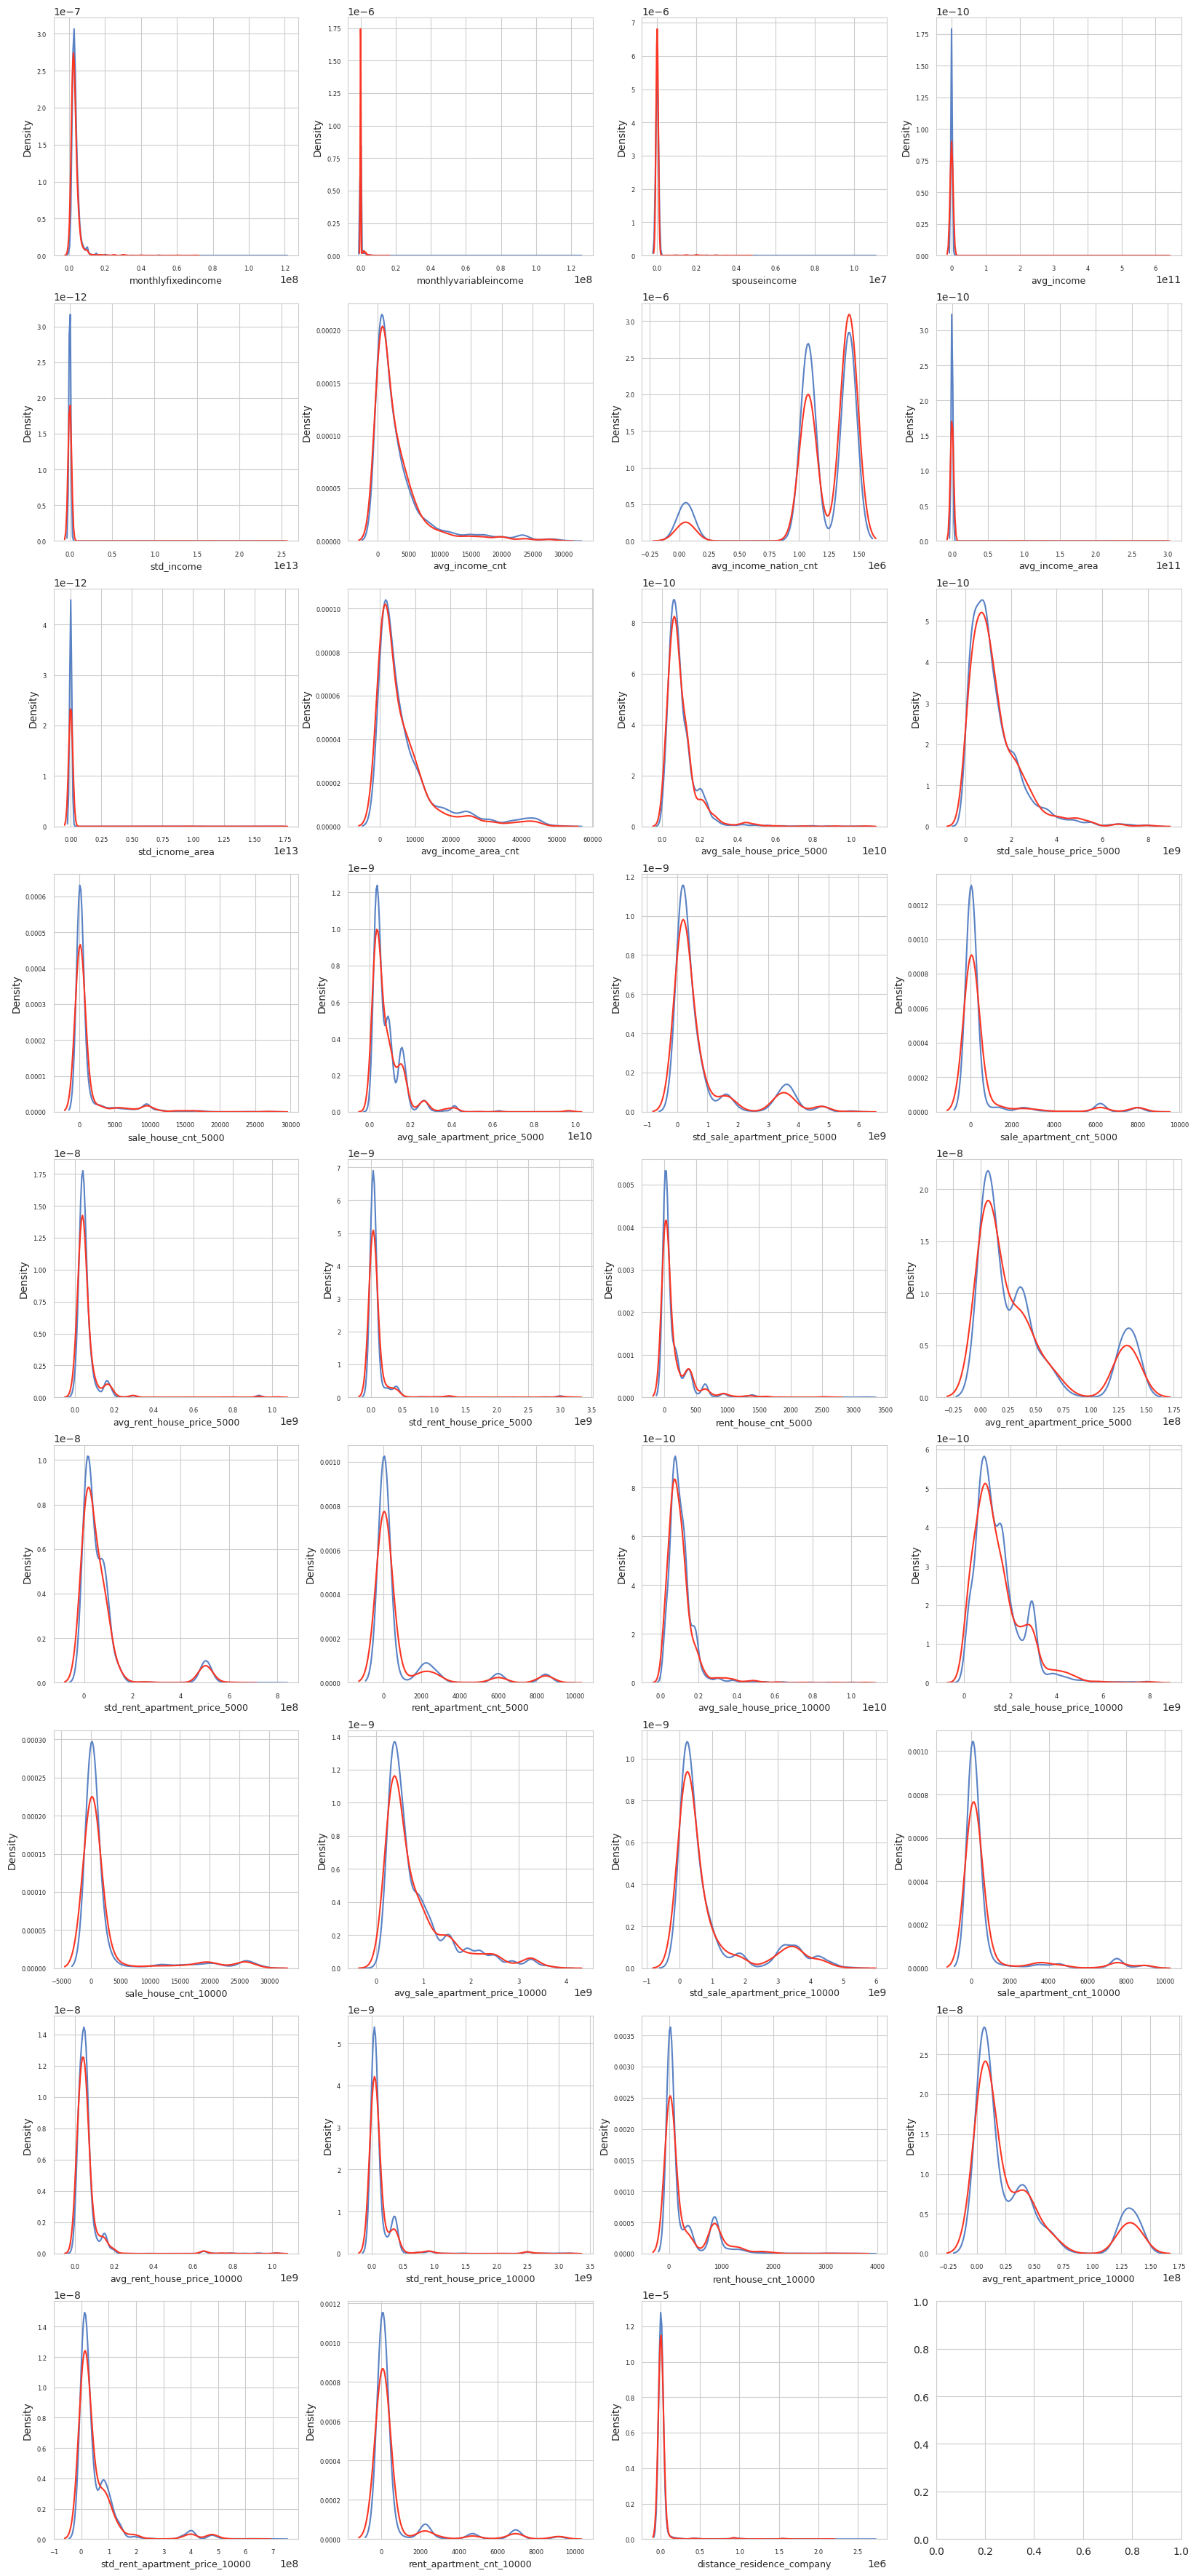

In [ ]:
plot_feature_kde(df_good, df_bad, '0', '1', columns, size=[9, 4])

>
Despite its complexity, we have identified some promising features to incorporate into our predictive model. These features are capable of highlighting distinctions in the target variable values, specifically distinguishing between flag_default 0 and 1. For instance, features like apartment_price, house_price, and income. To substantiate these findings, we will visualize a correlation heatmap for these features.

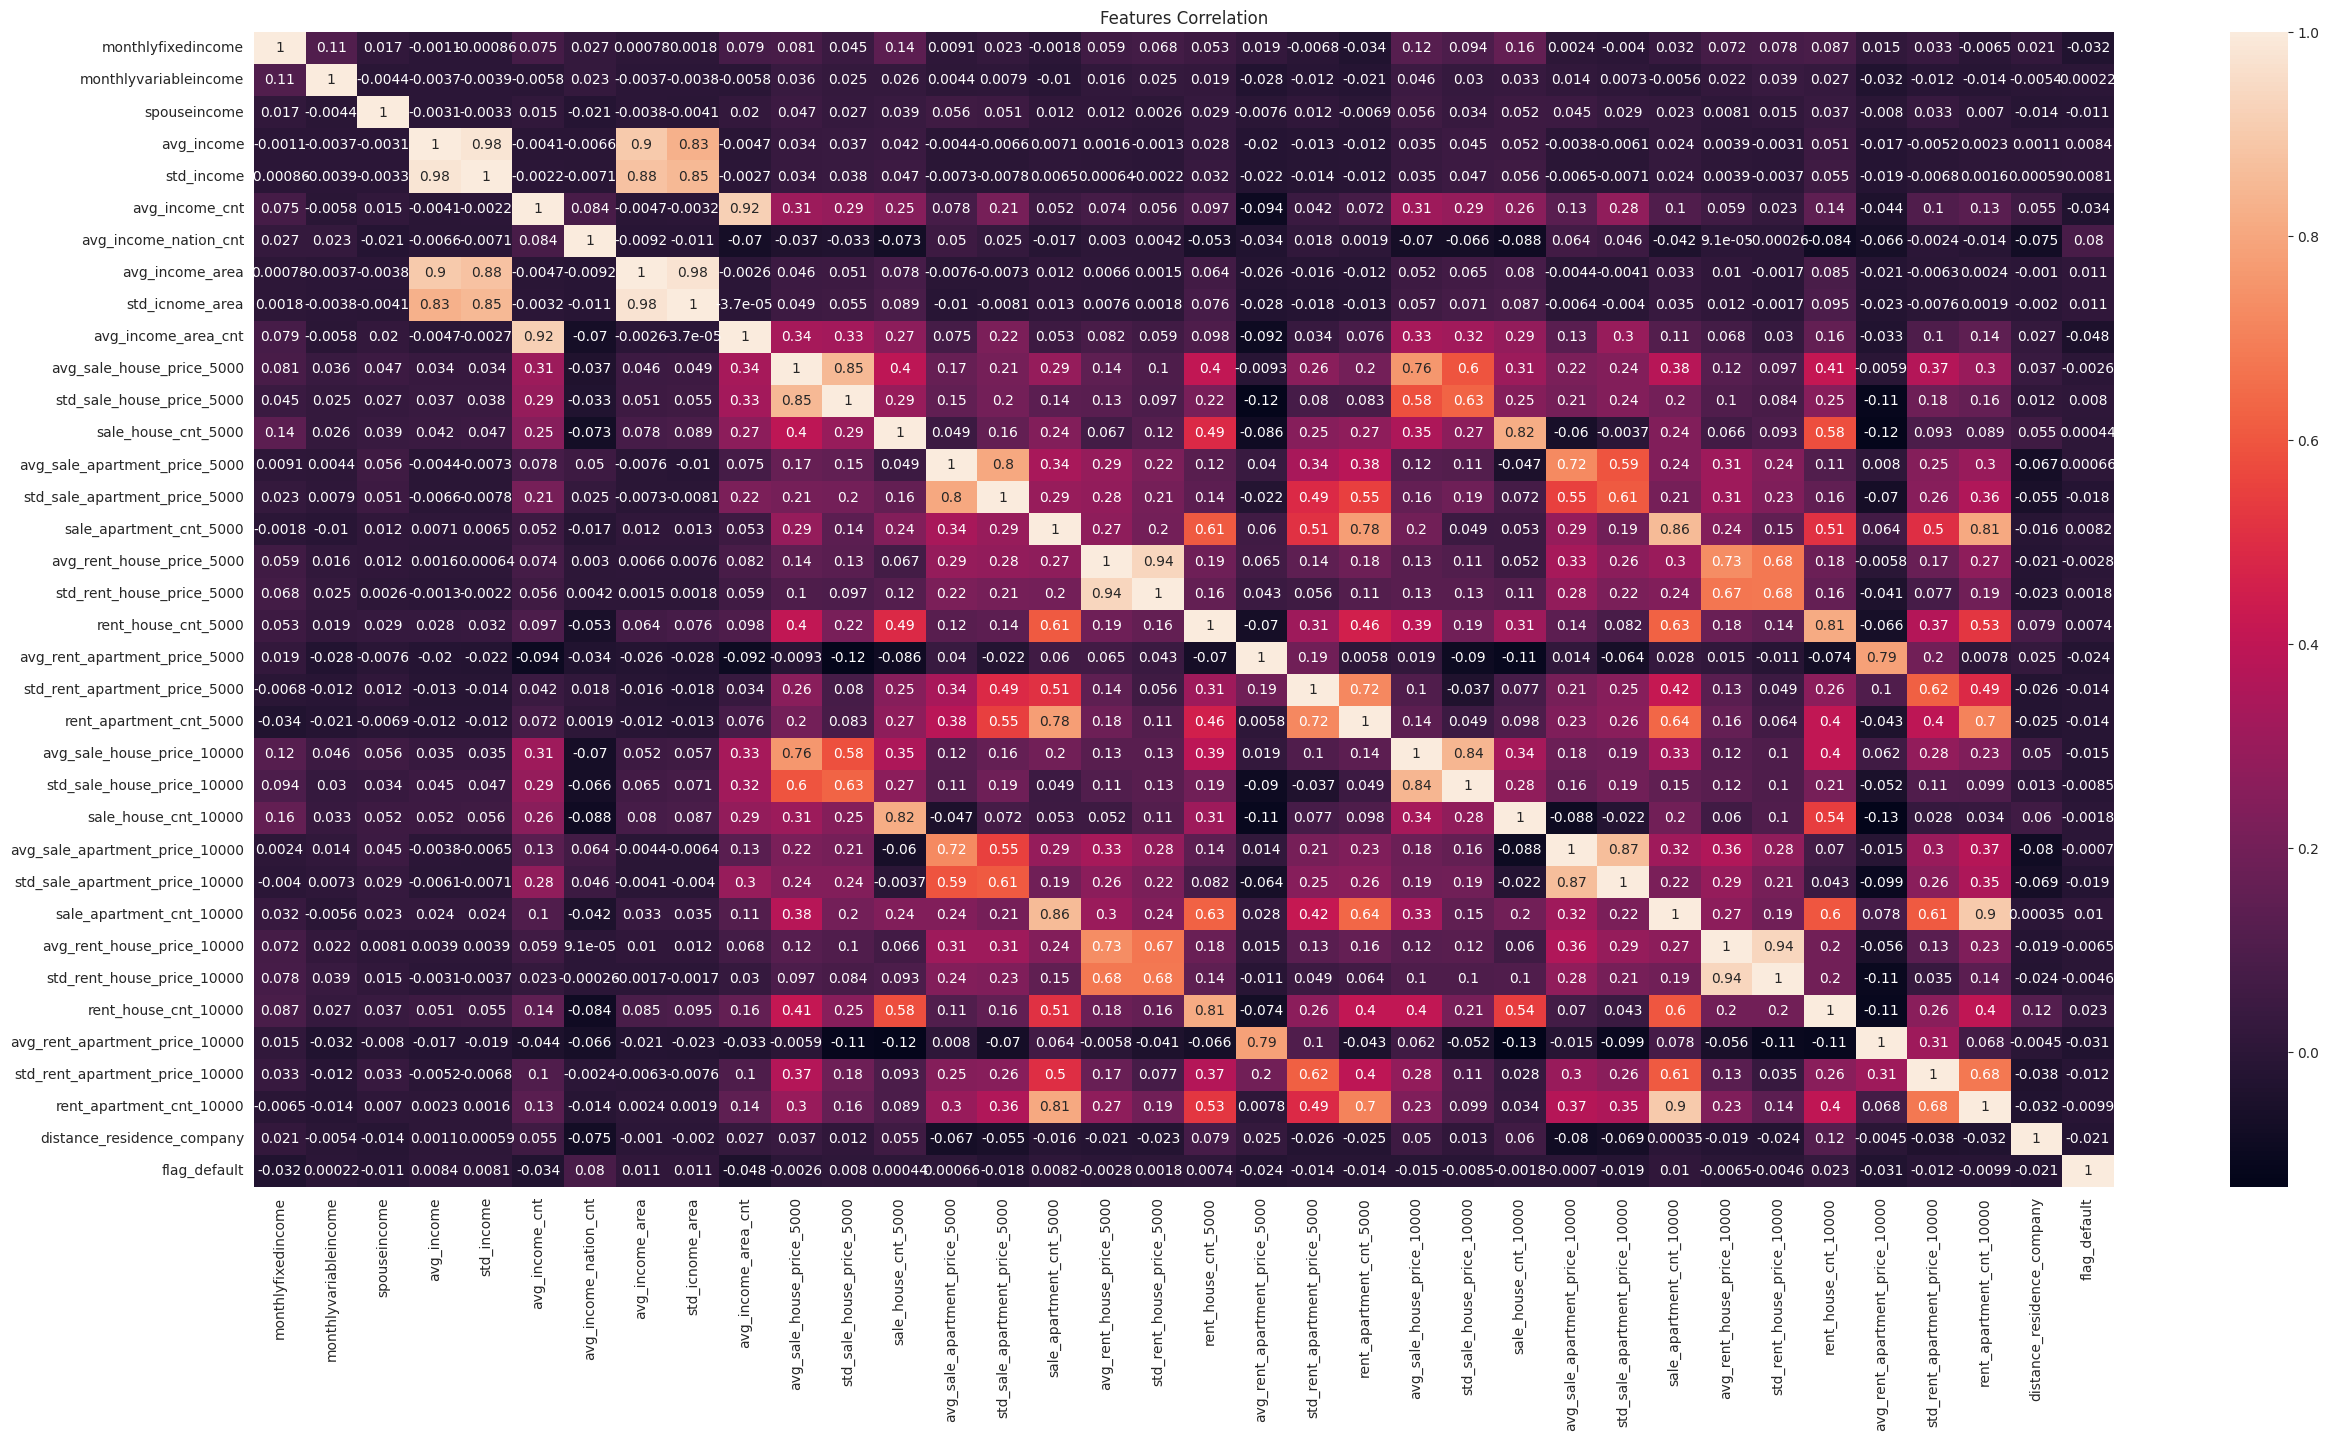

In [ ]:
plt.figure(figsize = (30,15))
sns.heatmap(df[columns+['flag_default']].corr(), annot=True)
plt.title('Features Correlation')
plt.show()

In [ ]:
highest_corr = df[columns+['flag_default']].corr()['flag_default'].sort_values()

print(f'Most positive correlation: {highest_corr.head(5).index.to_list()}')
print(f'Most negative correlation: {highest_corr.tail(5).index.to_list()}')

Most positive correlation: ['avg_income_area_cnt', 'avg_income_cnt', 'monthlyfixedincome', 'avg_rent_apartment_price_10000', 'avg_rent_apartment_price_5000']
Most negative correlation: ['avg_income_area', 'std_icnome_area', 'rent_house_cnt_10000', 'avg_income_nation_cnt', 'flag_default']


> It appears to be accurate that certain features identified through the kdeplot indeed exhibit the strongest correlation with the target variable, whether it's a positive or negative correlation.

> Before proceeding with feature engineering, I will opt for label encoding for categorical data instead of one-hot encoding. This decision is driven by the presence of a large number of categories in some categorical columns, and we are employing this approach to preemptively address any potential issues.

>
We will examine the loan_feat_engineering code, which is a Python function that performs various transformations on a given DataFrame. Firstly, the code encodes categorical columns into numerical values using LabelEncoder. Subsequently, we will find calculations of the day difference between the birthdate and the new application date, as well as the processing of the 'previous' column into several new columns.
>
Additionally, the code also computes the difference in years between various year columns and the new application year and birthdate. Furthermore, we will discover calculations of various income-related percentages using income columns and other average income data. Finally, we will come across the addition of the 'flag_default' column that indicates whether a client has a payment delay of more than 90 days. Consequently, we obtain a modified DataFrame with these additional features.

In [ ]:
def loan_feat_engineering(df):

    begin = time()
    print('Start...')

    cat_cols = ['gender', 'maritalstatus', 'education', 'professionid', 'jobtypeid', 'jobpos', 'birthplace']

    le = LabelEncoder()

    for col in cat_cols:
        df.loc[pd.isnull(df[col]),[col]] = 'NaN'
        df[cat_cols] = df[cat_cols].astype('str')
        df[cat_cols] = df[cat_cols].apply(lambda x: le.fit_transform(x))

    df[['birthdate', 'newapplicationdate']] = df[['birthdate', 'newapplicationdate']].astype('datetime64[D]')
    df['days_to_birth'] = (df['birthdate'] - df['newapplicationdate']).astype('timedelta64[D]')

    prev_split = df['previous'].apply(lambda x: str(x).split(','))
    prev_date = []
    prev_feat1 = []
    prev_feat2 = []
    prev_feat3 = []

    for v in prev_split.values:
        if v[0] == 'nan':
            prev_date.append(np.nan)
            prev_feat1.append(np.nan)
            prev_feat2.append(np.nan)
            prev_feat3.append(np.nan)
        else:
            prev_date.append(v[0])
            prev_feat1.append(float(v[1]))
            prev_feat2.append(int(v[2]))
            prev_feat3.append(float(v[3].split(';')[0]))

    df['prev_date'] = prev_date
    df['prev_feat1'] = prev_feat1
    df['prev_feat2'] = prev_feat2
    df['prev_feat3'] = prev_feat3

    df['prev_date'] = df['prev_date'].astype('datetime64[D]')
    df['days_to_prev'] = (df['prev_date'] - df['newapplicationdate']).astype('timedelta64[D]')

    df['years_to_stay'] = df['staysinceyear'] - df['newapplicationdate'].apply(lambda x: x.year)
    df['years_to_employment'] = df['EmploymentSinceYear'] - df['newapplicationdate'].apply(lambda x: x.year)
    df['years_to_mainbusiness'] = df['MainBusinessSinceYear'] - df['newapplicationdate'].apply(lambda x: x.year)


    df['years_to_stay_birth'] = df['staysinceyear'] - df['birthdate'].apply(lambda x: x.year)
    df['years_to_employment_birth'] = df['EmploymentSinceYear'] - df['birthdate'].apply(lambda x: x.year)
    df['years_to_mainbusiness_birth'] = df['MainBusinessSinceYear'] - df['birthdate'].apply(lambda x: x.year)

    df['perc_avg_income_nation'] = df['avg_income'] / df['avg_income_nation']
    df['perc_std_income_nation'] = df['std_income'] / df['std_income_nation']
    df['perc_avg_income_cnt_nation'] = df['avg_income_cnt'] / df['avg_income_nation_cnt']

    df['perc_avg_income_area'] = df['avg_income'] / df['avg_income_area']
    df['perc_std_income_area'] = df['std_income'] / df['std_icnome_area']
    df['perc_avg_income_cnt_area'] = df['avg_income_cnt'] / df['avg_income_area_cnt']

    df['flag_default'] = df['MaxOverDueDays'].apply(lambda x: 1 if x>90 else 0)

    print('End')
    print(f'Time Elapsed: {time()-begin}')
    return df

In [ ]:
df_loan = loan_feat_engineering(df)

Starting...
End
Time Elapsed: 1.0395889282226562


In [ ]:
df_loan.head()

,gender,birthdate,maritalstatus,numofdependence,education,professionid,homestatus,staysinceyear,EmploymentSinceYear,MainBusinessSinceYear,jobtypeid,jobpos,monthlyfixedincome,monthlyvariableincome,spouseincome,newapplicationdate,MaxOverDueDays,residencezipcode,companyzipcode,legalzipcode,residence_lat,residence_long,company_lat,company_long,legal_lat,legal_long,birthplace,avg_income,std_income,avg_income_cnt,avg_income_nation,std_income_nation,avg_income_nation_cnt,avg_income_area,std_icnome_area,avg_income_area_cnt,avg_sale_house_price_5000,std_sale_house_price_5000,sale_house_cnt_5000,avg_sale_apartment_price_5000,std_sale_apartment_price_5000,sale_apartment_cnt_5000,avg_rent_house_price_5000,std_rent_house_price_5000,rent_house_cnt_5000,avg_rent_apartment_price_5000,std_rent_apartment_price_5000,rent_apartment_cnt_5000,avg_sale_house_price_10000,std_sale_house_price_10000,sale_house_cnt_10000,avg_sale_apartment_price_10000,std_sale_apartment_price_10000,sale_apartment_cnt_10000,avg_rent_house_price_10000,std_rent_house_price_10000,rent_house_cnt_10000,avg_rent_apartment_price_10000,std_rent_apartment_price_10000,rent_apartment_cnt_10000,previous,distance_residence_company,flag_default,days_to_birth,prev_date,prev_feat1,prev_feat2,prev_feat3,days_to_prev,years_to_stay,years_to_employment,years_to_mainbusiness,years_to_stay_birth,years_to_employment_birth,years_to_mainbusiness_birth,perc_avg_income_nation,perc_std_income_nation,perc_avg_income_cnt_nation,perc_avg_income_area,perc_std_income_area,perc_avg_income_cnt_area
0,1,1985-12-15,2,0,0,2,4,2010.0,2006.0,NaN,4,3,4000000.0,0.0,0.0,2012-09-05,0.0,33117,33117.0,40256,-2.188377,106.116930,-2.188377,106.116930,-6.965395,107.614134,11,3.905436e+06,2.336988e+06,1775.0,9.336151e+08,9.643547e+11,1075437.0,4.391341e+06,2.876481e+06,3939.0,6.484425e+08,5.508472e+08,19.0,5.721607e+08,2.568821e+08,21.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,8.017849e+08,7.165296e+08,180.0,5.367837e+08,2.199754e+08,26.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,NaN,0.0,0,-9761.0,NaT,NaN,NaN,NaN,NaN,-2.0,-6.0,NaN,25.0,21.0,NaN,0.004183,0.000002,0.001650,0.889349,0.812447,0.450622
1,1,1969-12-20,1,2,2,1,1,1992.0,NaN,2005.0,17,5,3000000.0,0.0,0.0,2012-09-11,7.0,33681,33681.0,33681,-2.624456,106.581979,-2.624456,106.581979,-2.624456,106.581979,1956,3.308757e+06,9.339743e+05,2139.0,4.792272e+06,3.890322e+08,1418874.0,3.343014e+06,1.064039e+06,2442.0,1.663636e+09,1.567656e+09,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,"2012-09-11 03:40:58,2850000.00,7,0.00",0.0,0,-15606.0,2012-09-11,2850000.0,7.0,0.0,0.0,-20.0,NaN,-7.0,23.0,NaN,36.0,0.690436,0.002401,0.001508,0.989753,0.877764,0.875921
2,0,1976-08-17,1,2,6,1,1,2008.0,NaN,2010.0,17,5,3000000.0,0.0,0.0,2012-09-17,17.0,33674,33674.0,33674,-2.346277,105.993491,-2.346277,105.993491,-2.346277,105.993491,276,4.109646e+06,3.383104e+06,311.0,4.792272e+06,3.890322e+08,1418874.0,4.074921e+06,3.171127e+06,381.0,1.663636e+09,1.567656e+09,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+08,406.0,5.366614e+06,2.020980e+07,121.0,NaN,0.0,0,-13180.0,NaT,NaN,NaN,NaN,NaN,-4.0,NaN,-2.0,32.0,NaN,34.0,0.857557,0.008696,0.000219,1.008522,1.066846,0.816273
3,1,1985-01-09,1,1,2,1,1,2002.0,NaN,2005.0,17,5,5000000.0,0.0,0.0,2012-09-21,10.0,33782,33782.0,33782,-2.703447,106.393478,-2.703447,106.393478,-2.703447,106.393478,1212,3.489542e+06,5.893143e+06,459.0,4.792272e+06,3.890322e+08,1418874.0,3.537224e+06,5.802110e+06,479.0,6.318182e+08,5.085613e+08,11.0,3.316614e+08,1.278616e+08,20.0,3.547664e+07,5.030641e+07,179.0,3.619348e+07,7.643707e+07,23.0,1.501077e+09,1.652409e+09,13.0,5.573542e+08,2.387715e+08,18.0,7.216985e+07,3.546624e+

# Modelling

In [ ]:
X = df_loan[[col for col in df_loan.columns if col not in ['MaxOverDueDays', 'flag_default', 'birthdate', 'newapplicationdate', 'previous', 'prev_date']]]
y = df_loan['flag_default']

In [ ]:
print(X, y)

      gender  maritalstatus  numofdependence  education  professionid  \
0          1              2                0          0             2   
1          1              1                2          2             1   
2          0              1                2          6             1   
3          1              1                1          2             1   
4          0              1                1          2             1   
...      ...            ...              ...        ...           ...   
9369       1              1                0          6             3   
9370       1              1                2          0             2   
9371       0              1                1          6             3   
9372       1              1                1          0             3   
9373       0              2                0          6             3   

      homestatus  staysinceyear  EmploymentSinceYear  MainBusinessSinceYear  \
0              4         2010.0             

# Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=.25, stratify=y_train)
method_names=[]
method_scores=[]

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((5624, 75), (1875, 75), (1875, 75))

In [ ]:
clf = LGBMClassifier()

begin = time()
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='auc')
print('Training Complete !')
print(f'Training Time: {time() - begin}')


[LightGBM] [Info] Number of positive: 892, number of negative: 4732
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13357
[LightGBM] [Info] Number of data points in the train set: 5624, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158606 -> initscore=-1.668637
[LightGBM] [Info] Start training from score -1.668637
Training Complete !
Training Time: 1.2007431983947754


In [ ]:
df_feat_importance = pd.DataFrame()
df_feat_importance['feature'] = X.columns.to_list()
df_feat_importance['scores'] = clf.feature_importances_

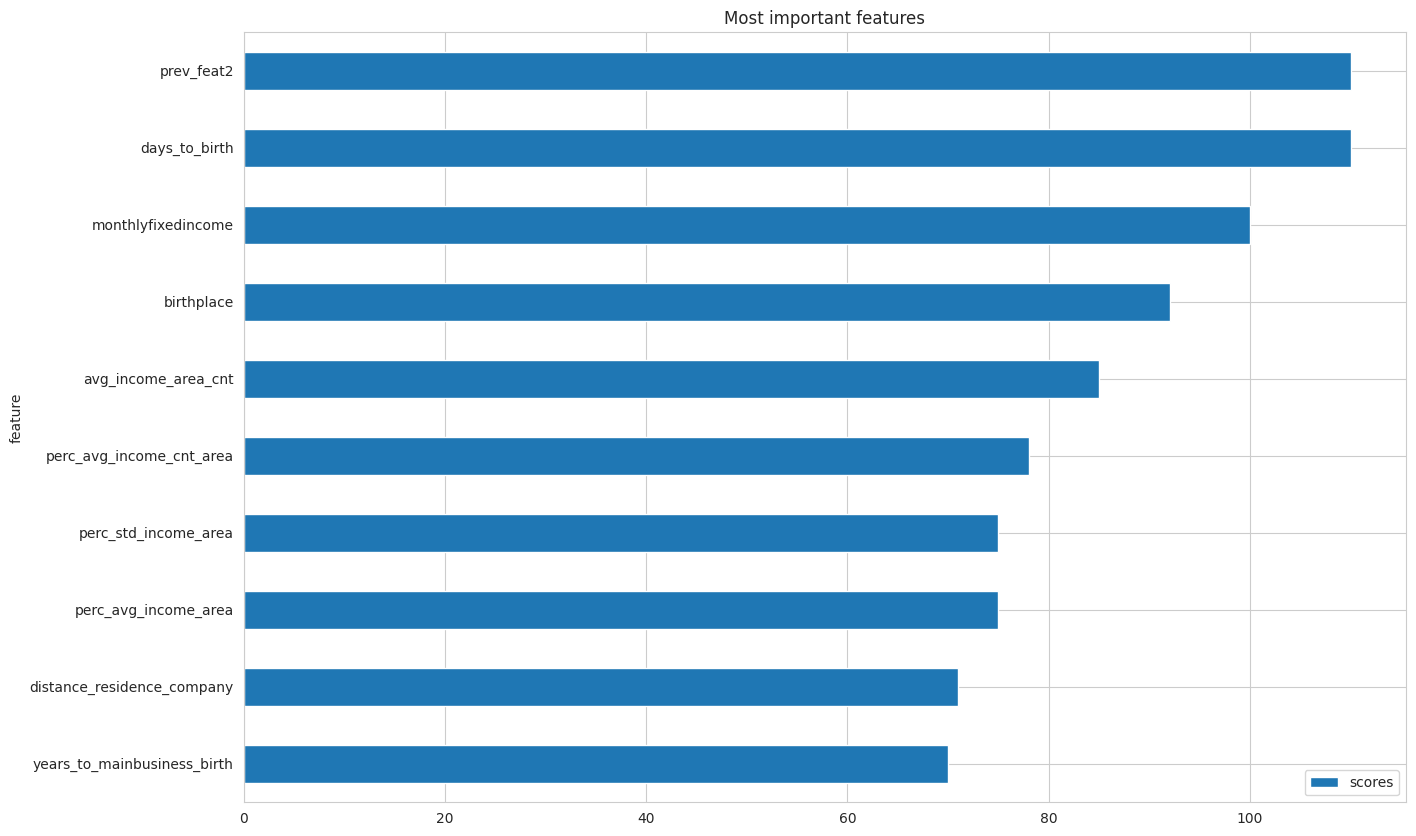

In [ ]:
df_feat_importance.sort_values(by='scores', ascending=False).head(10).plot(x='feature', y='scores', kind='barh', figsize=(15,10))
plt.gca().invert_yaxis()
plt.title('Most important features')
plt.show()

> What are the prominent characteristics of this dataset?

> Here, we can identify the top 10 significant features determined by our model, with many of our engineered features making the cut. For instance, "prev_feat2" is included. Additionally, the income feature is listed, indicating its anticipated significance based on our analysis of the KDE and correlation plot.

In [ ]:
y_pred = clf.predict_proba(X_test)[:, 1]
print('AUC score: %.6f' % roc_auc_score(y_test, y_pred))

AUC score: 0.720568


>
The AUC (Area Under the Receiver Operating Characteristic Curve) score of **0.720568** illustrates the model's ability to distinguish between two different classes or conditions in a classification problem. The closer it is to 1, the better the AUC score, indicating that the model has a good ability to differentiate between positive and negative classes. In this context, the value of **0.720568** suggests that the model has a reasonably good level of accuracy in making predictions, although there is still room for improvement. As a reference, an AUC score above 0.5 indicates that the model is better than random guessing, but its performance can be further enhanced through improved modeling or higher-quality data.

# Conclusion

> The model may become invalid if, for instance, new categories are introduced into the categorical columns. Since this model relies on existing data for predictions, its accuracy might diminish when compared to predictions made by experienced human professionals. This model's validity is confined to specific data domains; therefore, using it in a different country may yield dissimilar results.

> Furthermore, it appears that the model is not suffering from overfitting, as evidenced by the acceptable range of differences in loss and AUC (Area Under the Curve) score between the training and test results, with an AUC score of 0.720568. While cross-validation is an option, it may not be deemed necessary at this stage. If our model were to exhibit signs of overfitting in the future, we have already considered strategies such as increasing the training data, refining feature selection, and implementing early stopping during training.

> Notably, the model's runtime is quite efficient, taking only a few seconds, or at most a minute, to execute, even quicker when applied to a smaller data sample. For example, in this instance, we used 120,000 rows for training and 40,000 for both validation and testing. The preprocessing and feature engineering steps consume approximately 8 seconds, while the training phase requires about 10 seconds.

> With an additional week of dedicated effort, we can explore several avenues of improvement:

1. More Feature Engineering: We can delve deeper into feature engineering, extracting more meaningful information from the data to potentially enhance model performance.

2. Different Classifiers: Experimenting with alternative classifiers might lead to better results. Different algorithms can have varying strengths and weaknesses, so it's worth exploring these options.

3. Data Resampling: We can try oversampling or undersampling techniques to address class imbalance issues, which may further refine the model's predictions.

4. Alternative Algorithms and Ensemble Models: Implementing different machine learning algorithms and ensemble methods can provide diverse perspectives and potentially boost accuracy.

5. Hyperparameter Tuning: Fine-tuning the model's hyperparameters can help identify the optimal configuration for improved performance.

> In summary, while the current model has its limitations, it offers quick predictions and shows no signs of overfitting, as indicated by the AUC score of 0.720568. With additional time and exploration, there are several avenues we can pursue to potentially enhance its performance and adaptability to different scenarios.